In [1]:
import sys, os

ROOT_DIR = os.path.abspath(os.path.join('', 'src'))
sys.path.insert(0, os.path.join(ROOT_DIR))


In [2]:
from trainer import Trainer
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
from utils import get_rays, sample_from_rays, volume_rendering, image_float_to_uint8
import torchvision.transforms.functional as F

In [3]:
visualize = Trainer(save_dir='srncar_500_view3', gpu='0', jsonfile = 'srncar.json')
dataiter = iter(visualize.dataloader)

In [65]:
def imshow(img):
    if type(img) == torch.Tensor:
        img = img.cpu().numpy()
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [5]:
poses1 = torch.tensor([[ 4.9291e-01,  6.2601e-01, -6.0428e-01, -7.8557e-01],
        [-8.7008e-01,  3.5464e-01, -3.4233e-01, -4.4503e-01],
        [-1.0431e-07,  6.9451e-01,  7.1948e-01,  9.3533e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [6]:
poses2 = torch.tensor([[-4.6192e-01,  1.8756e-01, -8.6686e-01, -1.1269e+00],
        [-8.8692e-01, -9.7682e-02,  4.5147e-01,  5.8691e-01],
        [-1.4901e-07,  9.7738e-01,  2.1147e-01,  2.7491e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [7]:
poses3 = torch.tensor([[-8.9061e-01,  2.7879e-01, -3.5930e-01, -4.6710e-01],
        [-4.5478e-01, -5.4596e-01,  7.0364e-01,  9.1473e-01],
        [-4.4703e-08,  7.9007e-01,  6.1302e-01,  7.9693e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [8]:
poses4 = torch.tensor([[-8.5139e-01, -1.9503e-01,  4.8694e-01,  6.3302e-01],
        [ 5.2454e-01, -3.1655e-01,  7.9035e-01,  1.0275e+00],
        [ 1.3411e-07,  9.2831e-01,  3.7180e-01,  4.8335e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [9]:
poses_list = [poses1, poses2, poses3, poses4]

tensor([0], device='cuda:0')
tensor([[ 7.5301e-01, -2.2226e-03,  6.5800e-01,  8.5541e-01],
        [ 6.5801e-01,  2.5436e-03, -7.5301e-01, -9.7891e-01],
        [-7.4971e-08,  9.9999e-01,  3.3778e-03,  4.3913e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
torch.Size([3, 128, 128])
<class 'torch.Tensor'>


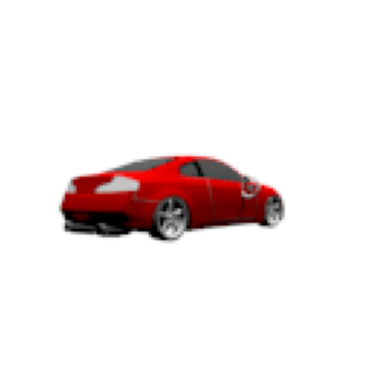

In [10]:
focal, H, W, imgs, poses, instances, obj_idx = next(dataiter)
obj_idx = obj_idx.to(visualize.device)
print(obj_idx)
print(poses[0][0])
imgs = imgs[0,-1].reshape(H,W,3).permute(2,0,1)
print(imgs.shape)
print(type(imgs))
imshow(imgs)

In [11]:
imgs_list = []

In [12]:
imgs_list.append(imgs)

tensor([10], device='cuda:0')
tensor([[ 2.4113e-01,  2.5219e-01,  9.3715e-01,  1.2183e+00],
        [ 9.7049e-01, -6.2659e-02, -2.3285e-01, -3.0270e-01],
        [ 2.9802e-08,  9.6565e-01, -2.5985e-01, -3.3781e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


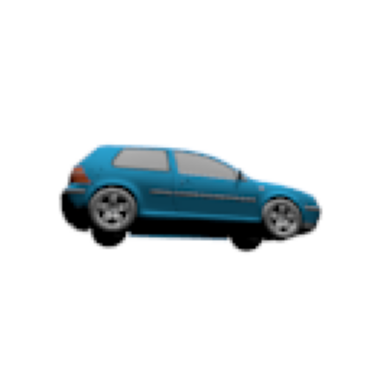

In [22]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [23]:
imgs_list.append(imgs_)

tensor([15], device='cuda:0')
tensor([[ 7.1678e-01, -1.3803e-01,  6.8350e-01,  8.8855e-01],
        [ 6.9730e-01,  1.4189e-01, -7.0260e-01, -9.1338e-01],
        [ 3.7253e-08,  9.8021e-01,  1.9795e-01,  2.5734e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


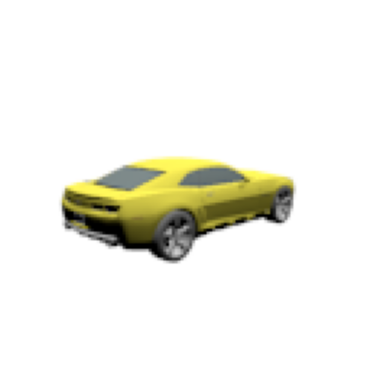

In [75]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [76]:
imgs_list.append(imgs_)

tensor([19], device='cuda:0')
tensor([[ 1.9541e-01,  3.8913e-01,  9.0022e-01,  1.1703e+00],
        [ 9.8072e-01, -7.7536e-02, -1.7937e-01, -2.3318e-01],
        [ 9.6858e-08,  9.1791e-01, -3.9678e-01, -5.1582e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


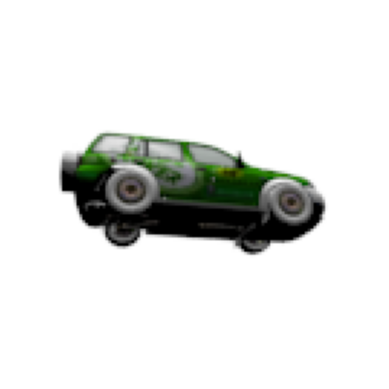

In [84]:
focal_, H_, W_, imgs_, poses_, instances_, obj_idx_ = next(dataiter)
obj_idx_ = obj_idx_.to(visualize.device)
print(obj_idx_)
print(poses_[0][0])
imgs_ = imgs_[0,-1].reshape(H_,W_,3).permute(2,0,1)
imshow(imgs_)

In [85]:
imgs_list.append(imgs_)

In [24]:
PATH = 'exps/srncar_500_view3/models.pth'
checkpoint = torch.load(PATH)

In [25]:
visualize.model.load_state_dict(checkpoint['model_params'])
visualize.shape_codes.load_state_dict(checkpoint['shape_code_params'])
visualize.texture_codes.load_state_dict(checkpoint['texture_code_params'])

<All keys matched successfully>

In [26]:
shape_code, texture_code = visualize.shape_codes(obj_idx), visualize.texture_codes(obj_idx)
rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses[0,0])
xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])

In [63]:
m=5
z_shape_np = np.zeros((m, 128))
z_txt_np = np.zeros((m, 128))
img_est_np = []
with torch.no_grad():
    for i in range(m):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        z_shape_np[i] = z_shape.cpu().numpy()
        z_txt_np[i] = z_txt.cpu().numpy()
        img_est_np.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


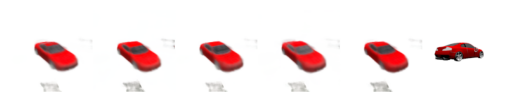

In [64]:
img_est_np.append(imgs)
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np),pad_value = 1))

In [92]:
img_novel_view = []
with torch.no_grad():
    for i in range(len(poses_list)):
        rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses_list[i])
        xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_novel_view.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


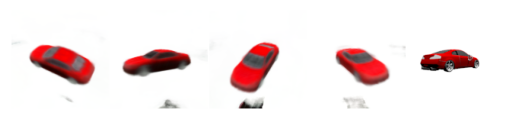

In [93]:
img_novel_view.append(imgs)
imshow(torchvision.utils.make_grid(torch.tensor(img_novel_view),pad_value = 1))

In [31]:
shape_code_, texture_code_ = visualize.shape_codes(obj_idx_), visualize.texture_codes(obj_idx_)
rays_o_, viewdir_ = get_rays(H_.item(), W_.item(), focal, poses[0,0])
xyz_, viewdir_, z_vals_ = sample_from_rays(rays_o_, viewdir_, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])

In [42]:
n = 4
shape_interpolation_list = []
for i in range(n+1):
    shape_interpolation_list.append(shape_code + i*(shape_code_-shape_code)/n)

In [43]:
n = 4
texture_interpolation_list = []
for i in range(n+1):
    texture_interpolation_list.append(texture_code + i*(texture_code_-texture_code)/n)

In [44]:
img_texture_interpolation_list = []
img_texture_interpolation_list.append(imgs.numpy())
with torch.no_grad():
    for i in range(len(texture_interpolation_list)):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code, 
                                  texture_interpolation_list[i],
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_texture_interpolation_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


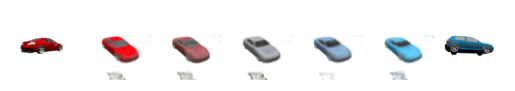

<Figure size 640x480 with 0 Axes>

In [45]:
img_texture_interpolation_list.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_texture_interpolation_list),pad_value = 1))

In [46]:
img_shape_interpolation_list = []
img_shape_interpolation_list.append(imgs.numpy())
with torch.no_grad():
    for i in range(len(shape_interpolation_list)):
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_interpolation_list[i], 
                                  texture_code,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_shape_interpolation_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


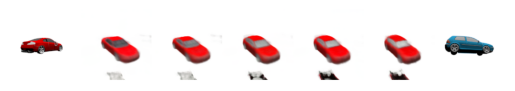

<Figure size 640x480 with 0 Axes>

In [47]:
img_shape_interpolation_list.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_shape_interpolation_list),pad_value = 1))

In [35]:
n = 5
z_shape_np_ = np.zeros((n, 128))
z_txt_np_ = np.zeros((n, 128))
img_est_np_ = []
with torch.no_grad():
    for i in range(n):
        z_shape_ = torch.randn(1, 128).cuda()
        z_txt_ = torch.randn(1, 128).cuda()
        sigmas_, rgbs_ = visualize.model(xyz_.to(visualize.device),
                                  viewdir_.to(visualize.device),
                                  shape_code_, 
                                  texture_code_,
                                  z_shape_,
                                  z_txt_)
        rgb_rays_, _ = volume_rendering(sigmas_, rgbs_, z_vals_.to(visualize.device))
        z_shape_np_[i] = z_shape_.cpu().numpy()
        z_txt_np_[i] = z_txt_.cpu().numpy()
        img_est_np_.append(rgb_rays_.view(H_,W_,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


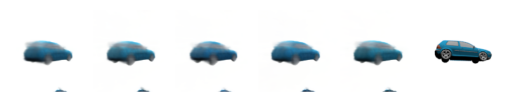

<Figure size 640x480 with 0 Axes>

In [36]:
img_est_np_.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np_),pad_value = 1))

In [40]:
img_novel_view_ = []
with torch.no_grad():
    for i in range(len(poses_list)):
        rays_o, viewdir = get_rays(H.item(), W.item(), focal, poses_list[i])
        xyz, viewdir, z_vals = sample_from_rays(rays_o, viewdir, visualize.hpams['near'], visualize.hpams['far'],
                                            visualize.hpams['N_samples'])
        z_shape = torch.randn(1, 128).cuda()
        z_txt = torch.randn(1, 128).cuda()
        sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                  viewdir.to(visualize.device),
                                  shape_code_, 
                                  texture_code_,
                                  z_shape,
                                  z_txt)
        rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
        img_novel_view_.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


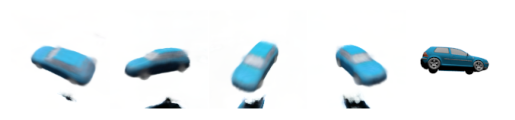

<Figure size 640x480 with 0 Axes>

In [41]:
img_novel_view_.append(imgs_)
imshow(torchvision.utils.make_grid(torch.tensor(img_novel_view_),pad_value = 1))

In [34]:
shape_code_list = []
texture_code_list = []

In [66]:
shape_code_list.append(visualize.shape_codes(obj_idx))
texture_code_list.append(visualize.texture_codes(obj_idx))

In [86]:
shape_code_list.append(visualize.shape_codes(obj_idx_))
texture_code_list.append(visualize.texture_codes(obj_idx_))

In [87]:
len(shape_code_list)

4

In [88]:
len(texture_code_list)

4

In [89]:
len(imgs_list)

4

In [90]:
img_est_np_list = []
with torch.no_grad():
    for i in range(len(shape_code_list)):
        for j in range(len(texture_code_list)):
            print(i,j)
            z_shape = torch.randn(1, 128).cuda()
            z_txt = torch.randn(1, 128).cuda()
            sigmas, rgbs = visualize.model(xyz.to(visualize.device),
                                        viewdir.to(visualize.device),
                                        shape_code_list[i], 
                                        texture_code_list[j],
                                        z_shape,
                                        z_txt)
            rgb_rays, _ = volume_rendering(sigmas, rgbs, z_vals.to(visualize.device))
            img_est_np_list.append(rgb_rays.view(H,W,3).permute(2,0,1).cpu().numpy())
        img_est_np_list.append(imgs_list[i])

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


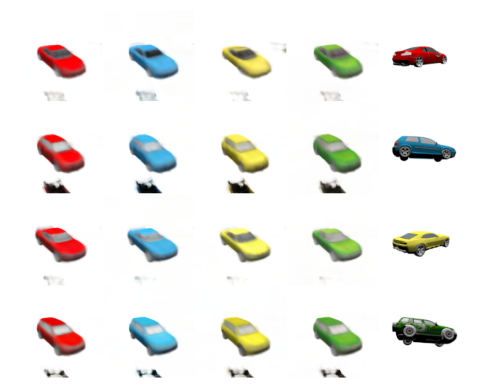

In [91]:
imshow(torchvision.utils.make_grid(torch.tensor(img_est_np_list),pad_value = 1, nrow = len(shape_code_list) + 1))